# Causality and control

We take for granted how easily we learn the causal effects of our actions. The effects of our actions take place in a blooming, buzzing mileau of events in our immediate environment - any of which could be a potential outcome of our action. Likewise, other (hidden) causes could be lurking in the background to be producing the outcomes we think our actions are producing.  

Usually we can distinguish the effect of our actions from other confounding influences because the effects are immediate and occur close by. However in many instances the consequences of our actions are delayed in time or distant in location. For instance, determining something as prosaic as whether the "close door" button on an elevator is  connected to the elevator door, or the pedestrian button at a traffic light controls the walk light, can be difficult for many people (ref here). And despite major advances in reinforcement learning and automated control, machines and robots do even worse than us at generating an accurate causal model of the world. Temporal and spatial proximity are often insufficient to establish a causal connection between events.   

We can also describe the relation between events in terms of their conditional probability, which exists regardless of distance in time or space. In this case the conditional probability of an outcome, given an action can be expressed as _P(O|A)_. However, the _unique effect_ of an action, with respect to a particular outcome, can be expressed as the difference between _P(O|A)_ and all the other background events that could cause the outcome, i.e., _P(O|~A)_ :

\begin{equation*}
\Delta P = P(O \mid A) - P(O \mid \bar{A})
\end{equation*}

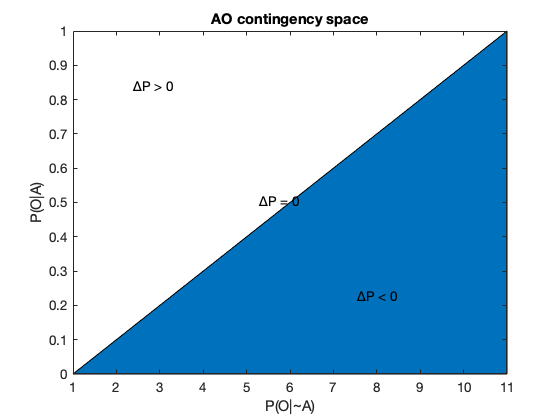

In [160]:
x = 0:.1:1;
area(x)
title('AO contingency space')
xlabel('P(O|~A)')
ylabel('P(O|A)')
annotation('textbox', [.225 .725 .1 .1], ...
           'String',{'∆P > 0'}, ...
           'EdgeColor','none')
annotation('textbox', [.625 .225 .1 .1], ...
           'String',{'∆P < 0'}, ...
           'EdgeColor','none')
annotation('textbox', [.45 .45 .1 .1], ...
           'String',{'∆P = 0'}, ...
           'EdgeColor','none')

The unique effect (∆P) tells us how much control the action has over the outcome. When _∆P = 0_ it tells us the outcome is just as likely to occur whether or not we perform the action, so it has no control over the outcome. As ∆P moves away from zero (the diagonal), the action exerts more control over the outcome, either producing it when _∆P > 0_, or inhibiting it when _∆P < 0_.  

People are very sensitive to the unique effect of their actions, as shown by contingency degradation below.

#### Contingency Degradation

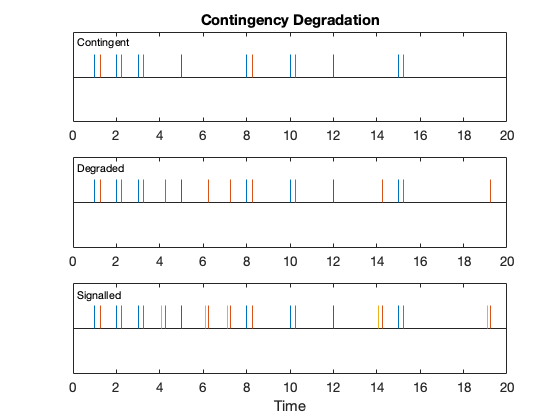

In [144]:
% Contingent
actions = round(rand(20, 1));

outcomes = round(rand(20, 1));

earned = actions .* outcomes;

signals = (1 - actions).*outcomes;

% for plotting
x = [[1:20]', [1:20]'+0.25];
y = [actions, earned];
subplot(3, 1, 1)
stem(x, y, 'Marker','none');
ylim([-2 2])
xlim([0 20])
set(gca,'YTick', [])
title('Contingency Degradation')
subplot(3, 1, 2)
y = [actions, outcomes];
stem(x, y, 'Marker','none');
ylim([-2 2])
xlim([0 20])
set(gca,'YTick', [])
subplot(3, 1, 3)
y = [actions, outcomes, signals];
x = [[1:20]', [1:20]'+0.25, [1:20]'+0.1];
stem(x, y, 'Marker','none');
ylim([-2 2])
xlim([0 20])
set(gca,'YTick', [])
xlabel('Time')
annotation('textbox', [.125 .225 .1 .1], ...
           'String',{'Signalled'}, ...
           'FontSize', 8, ...
           'EdgeColor','none')
annotation('textbox', [.125 .525 .1 .1], ...
           'String',{'Degraded'}, ...
           'FontSize', 8, ...
           'EdgeColor','none')
annotation('textbox', [.125 .825 .1 .1], ...
           'String',{'Contingent'}, ...
           'FontSize', 8, ...
           'EdgeColor','none')

Each plot shows a time series of actions (blue) and outcomes (red) under three different cases of contingency (**contingent, degraded, signalled**). In the contingent case (**top plot**) outcomes only ever occur shortly after an action, so the outcome is perfectly contingent (because _P(O|~A) = 0_), and ∆P > 0.

In the degraded case (**middle plot**), non-contingent outcomes are introduced, so now _P(O|~A) > 0_ and ∆P = 0. Under these conditions, people tend to stop responding (or never start).  

The key to our understanding of causal learning is why people stop responding here. When asked, most people say they could no longer distinguish which outcomes they were causing and report the action no longer controls the outcome. This gives us a clue that they are using a causal model to decide what to do.  

However most theories start from the assumption that the rational action is not necessarily the most causal, but the one with the greatest expected value. The expected value is given by the conditional probability of reward given the action, i.e., $P(O_{RWD} \mid A)$. As we have just seen, this conditional probability can be present regardless of whether the action _uniquely causes_ the reward or not. 

How then do such theories explain the contingency degradation effect just described? The expected value of the action does not change with contingency degradation, so the decrease in responding is attributed to the increasing value of other competing actions, e.g., "waiting". For instance, as reward is delivered non-contingently the value of waiting increases. Once the value of waiting matches (or exceeds) the value of the action then responding will stop (e.g., see Solway & Botvinick, 2012, pp.130). Thus, whereas responding is determined by the probability of the outcome given that action; not responding is determined by the probability of the outcome in the absence of the action.

The signalled case (**bottom plot**) shows one way the causal account and value account can be distinguished. In the signalled case, a signal or cue is provided before each non-contingent outcome. This should rescue the causal status of the action as now people can clearly see which outcomes they are causing and which they are not. However it will not change the relative value of responding or not responding ("waiting"). 